# Usage (details: policy measures)
Here, we will analyse the relationship of policy measures and parameter values of SIR-derived ODE models. Policy measures are tracked by [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker).

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
from pprint import pprint

In [3]:
import covsirphy as cs
cs.__version__

'2.8.2'

In [4]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=False)
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

## Class for policy measure analysis
We will `PolicyMeasures` class to find relationship of policy measures and parameter values of SIR-derived ODE models.

In [5]:
# Create analyser with tau value 360 [min] (can be changed)
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)
# The number of registerd countries
len(analyser.countries)

184

In [6]:
# We can get Scenario instance for detailed scenario analysis
type(analyser.scenario("Japan"))

covsirphy.analysis.scenario.Scenario

## Set phases with S-R trend analysis
We will perform S-R trend analysis to set phases in all countries. Countries which do not have **9th phases** will be un-registered for the next analysis. This number will be adjusted for your analysis.

In [7]:
# Show the number of phases of all countries
analyser.trend()
pprint(analyser.phase_len(), compact=True)

{

3

: 

['Tanzania', 'Dominica', 'Libya', 'Myanmar']

,
 

4

: 

['Papua New Guinea', 'Belize', 'Trinidad and Tobago', 'Fiji', 'Brunei']

,
 

5

: 

[

'Bahamas'

, 

'Tunisia'

, 

'Uganda'

, 

'Namibia'

, 

'Grenada'

,
     

'Antigua and Barbuda'

, 

'Lesotho'

, 

'Mauritius'

]

,
 

6

: 

[

'Norway'

, 

'Equatorial Guinea'

, 

'Rwanda'

, 

'Kazakhstan'

, 

'Netherlands'

,
     

'Guyana'

, 

'Iceland'

, 

'Philippines'

, 

'Central African Republic'

, 

'Malta'

,
     

'Croatia'

, 

'Jordan'

, 

'Ireland'

, 

'Kyrgyzstan'

, 

'Sao Tome and Principe'

,
     

'Botswana'

, 

'Yemen'

, 

'Lebanon'

, 

'Vietnam'

, 

'Mongolia'

, 

'Kosovo'

, 

'Angola'

,
     

'Liechtenstein'

, 

'Venezuela'

, 

'Cambodia'

, 

'Seychelles'

]

,
 

7

: 

[

'Zimbabwe'

, 

'Bhutan'

, 

'Paraguay'

, 

'Cameroon'

, 

'Saint Lucia'

, 

'Cyprus'

,
     

'Comoros'

, 

'Ethiopia'

, 

'Montenegro'

, 

'Syria'

, 

'Slovakia'

, 

'Afghanistan'

,
     

'Taiwan'

, 

'Monaco'

, 

'Zambia'

, 

'Israel'

, 

'Madagascar'

, 

'Burundi'

,
     

'Maldives'

, 

'New Zealand'

, 

'Barbados'

, 

'Malawi'

, 

'Guinea-Bissau'

, 

'Spain'

,
     

'Australia'

, 

'Eritrea'

, 

'Saint Vincent and the Grenadines'

, 

'South Sudan'

,
     

'India'

, 

'Mozambique'

, 

'Palestine'

, 

'Greece'

, 

'Gambia'

, 

'Jamaica'

,
     

'Colombia'

, 

'Morocco'

, 

'San Marino'

, 

'Guatemala'

, 

'Kenya'

, 

'Thailand'

]

,
 

8

: 

[

'Cape Verde'

, 

'Czech Republic'

, 

'Sudan'

, 

'Albania'

, 

'Luxembourg'

, 

'Nepal'

,
     

'Costa Rica'

, 

'Somalia'

, 

'Haiti'

, 

'Ghana'

, 

'Nicaragua'

, 

'Iraq'

,
     

'South Africa'

, 

'Tajikistan'

, 

'Japan'

, 

'Mauritania'

, 

'Slovenia'

, 

'Niger'

,
     

'Congo'

, 

'Chad'

, 

'Oman'

, 

'Djibouti'

, 

'Argentina'

, 

'Andorra'

, 

'Suriname'

]

,
 

9

: 

[

'Liberia'

, 

'Azerbaijan'

, 

'Mali'

, 

'Ukraine'

, 

'Uruguay'

, 

'El Salvador'

,
     

'Pakistan'

, 

'Austria'

, 

'Gabon'

, 

'Georgia'

, 

'Korea, South'

, 

'Bermuda'

,
     

'Armenia'

, 

'Bosnia and Herzegovina'

, 

'Sierra Leone'

, 

'Germany'

,
     

'Lithuania'

, 

'Qatar'

, 

'Canada'

, 

'Malaysia'

, 

'Benin'

, 

'Finland'

, 

'Ecuador'

,
     

'Swaziland'

, 

'Singapore'

, 

'Sri Lanka'

, 

'China'

, 

'Uzbekistan'

, 

'Chile'

,
     

'Belarus'

]

,
 

10

: 

[

'Denmark'

, 

'Poland'

, 

'Latvia'

, 

'Bolivia'

, 

'Senegal'

, 

'Moldova'

,
      

'Saudi Arabia'

, 

'Belgium'

, 

'Bulgaria'

, 

'Serbia'

, 

'Panama'

, 

'Indonesia'

,
      

'Nigeria'

, 

'Algeria'

, 

'Estonia'

, 

'Egypt'

, 

'Cuba'

, 

'Mexico'

, 

'Togo'

,
      

'Honduras'

, 

'Macedonia'

, 

'Hungary'

, 

'Dominican Republic'

]

,
 

11

: 

[

'Guinea'

, 

'Italy'

, 

'Kuwait'

, 

'Burkina Faso'

, 

'Turkey'

, 

'Romania'

,
      

'Switzerland'

, 

'Peru'

, 

'Brazil'

, 

'Iran'

, 

'Portugal'

, 

'Bangladesh'

,
      

'United States'

, 

'France'

]

,
 

12

: 

['Bahrain', 'Russia', 'United Arab Emirates']

}

In [8]:
# Set phases with S-R trend analysis
analyser.trend(min_len=11)
# The number of countries
len(analyser.countries)

17

In [9]:
phase_len_dict = analyser.phase_len()
pprint(phase_len_dict, compact=True)

{

11

: 

[

'Guinea'

, 

'Italy'

, 

'Kuwait'

, 

'Burkina Faso'

, 

'Turkey'

, 

'Romania'

,
      

'Switzerland'

, 

'Peru'

, 

'Brazil'

, 

'Iran'

, 

'Portugal'

, 

'Bangladesh'

,
      

'United States'

, 

'France'

]

,
 

12

: 

['Bahrain', 'Russia', 'United Arab Emirates']

}

In [10]:
# Here, only show the countries which have the most phases
countries_show = max(phase_len_dict.items(), key=lambda x: x[0])[1]
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population
Country              Phase                                        
Bahrain              0th    Past  06Mar2020  06May2020     1569439
                     1st    Past  07May2020  30May2020     1569439
                     2nd    Past  31May2020  10Jun2020     1569439
                     3rd    Past  11Jun2020  20Jun2020     1569439
                     4th    Past  21Jun2020  28Jun2020     1569439
                     5th    Past  29Jun2020  07Jul2020     1569439
                     6th    Past  08Jul2020  15Jul2020     1569439
                     7th    Past  16Jul2020  27Jul2020     1569439
                     8th    Past  28Jul2020  10Aug2020     1569439
                     9th    Past  11Aug2020  24Aug2020     1569439
                     10th   Past  25Aug2020  06Sep2020     1569439
                     11th   Past  07Sep2020  17Sep2020     1569439
Russia               0th    Past  12Feb2020  06May2020   330457362
                     1st    Past  07May2020  17May2020   330457362
                     2nd    Past  18May2020  27May2020   330457362
                     3rd    Past  28May2020  05Jun2020   330457362
                     4th    Past  06Jun2020  13Jun2020   330457362
                     5th    Past  14Jun2020  23Jun2020   330457362
                     6th    Past  24Jun2020  05Jul2020   330457362
                     7th    Past  06Jul2020  17Jul2020   330457362
                     8th    Past  18Jul2020  31Jul2020   330457362
                     9th    Past  01Aug2020  14Aug2020   330457362
                     10th   Past  15Aug2020  30Aug2020   330457362
                     11th   Past  31Aug2020  17Sep2020   330457362
United Arab Emirates 0th    Past  12Feb2020  25Apr2020     9630959
                     1st    Past  26Apr2020  12May2020     9630959
                     2nd    Past  13May2020  20May2020     9630959
                     3rd    Past  21May2020  06Jun2020     9630959
                     4th    Past  07Jun2020  19Jun2020     9630959
                     5th    Past  20Jun2020  01Jul2020     9630959
                     6th    Past  02Jul2020  11Jul2020     9630959
                     7th    Past  12Jul2020  26Jul2020     9630959
                     8th    Past  27Jul2020  15Aug2020     9630959
                     9th    Past  16Aug2020  31Aug2020     9630959
                     10th   Past  01Sep2020  08Sep2020     9630959
                     11th   Past  09Sep2020  17Sep2020     9630959

## Parameter estimation
we will estimate the parameter values with SIR-derived ODE models in each country.

In [11]:
# Parameter estimation with SIR-F model
analyser.estimate(cs.SIRF)


<SIR-F model: parameter estimation>

Running optimization with 4 CPUs...

	KWT,  8th phase (09Aug2020 - 21Aug2020): finished  304 trials in 0 min 10 sec

	TUR,  8th phase (05Aug2020 - 20Aug2020): finished 1430 trials in 1 min  0 sec

	USA,  3rd phase (06Jun2020 - 24Jun2020): finished 1416 trials in 1 min  0 sec

	RUS,  2nd phase (18May2020 - 27May2020): finished 1440 trials in 1 min  0 sec

	BFA, 10th phase (09Sep2020 - 17Sep2020): finished 1436 trials in 1 min  0 sec

	KWT,  5th phase (05Jul2020 - 14Jul2020): finished  302 trials in 0 min 10 sec

	ITA, 10th phase (28Aug2020 - 17Sep2020): finished 1404 trials in 1 min  0 sec

	ITA,  4th phase (20Apr2020 - 30Apr2020): finished 1410 trials in 1 min  0 sec

	PER,  1st phase (11May2020 - 29May2020): finished 1408 trials in 1 min  0 sec

	BFA,  0th phase (21Mar2020 - 31Mar2020): finished 1411 trials in 1 min  0 sec

	ROU,  3rd phase (20Jun2020 - 11Jul2020): finished 1314 trials in 1 min  0 sec

	RUS,  6th phase (24Jun2020 - 05Jul2020): finished 1292 trials in 1 min  0 sec

	GIN,  2nd phase (12May2020 - 23May2020): finished 1277 trials in 1 min  0 sec

	PER,  7th phase (11Aug2020 - 18Aug2020): finished 1296 trials in 1 min  0 sec

	USA,  5th phase (08Jul2020 - 17Jul2020): finished  388 trials in 0 min 15 sec

	TUR,  6th phase (28Jun2020 - 14Jul2020): finished  492 trials in 0 min 20 sec

	BHR, 11th phase (07Sep2020 - 17Sep2020): finished 1230 trials in 1 min  0 sec

	PER,  8th phase (19Aug2020 - 27Aug2020): finished 1252 trials in 1 min  0 sec

	BRA,  6th phase (29Jul2020 - 05Aug2020): finished 1276 trials in 1 min  0 sec

	GIN,  0th phase (03Apr2020 - 30Apr2020): finished 1287 trials in 1 min  0 sec

	FRA,  8th phase (30Jul2020 - 18Aug2020): finished  655 trials in 0 min 25 sec

	CHE,  1st phase (29Mar2020 - 05Apr2020): finished 1352 trials in 1 min  0 sec

	ITA,  0th phase (24Feb2020 - 20Mar2020): finished 1317 trials in 1 min  0 sec

	BRA,  4th phase (09Jul2020 - 20Jul2020): finished  419 trials in 0 min 15 sec

	PRT,  8th phase (06Aug2020 - 24Aug2020): finished 1312 trials in 1 min  0 sec

	KWT,  7th phase (27Jul2020 - 08Aug2020): finished 1333 trials in 1 min  0 sec

	ITA,  3rd phase (10Apr2020 - 19Apr2020): finished  418 trials in 0 min 15 sec

	USA,  6th phase (18Jul2020 - 27Jul2020): finished  421 trials in 0 min 15 sec

	BGD,  6th phase (17Jul2020 - 27Jul2020): finished  154 trials in 0 min  5 sec

	CHE,  0th phase (03Mar2020 - 28Mar2020): finished 1319 trials in 1 min  0 sec

	RUS,  4th phase (06Jun2020 - 13Jun2020): finished 1344 trials in 1 min  0 sec

	FRA,  9th phase (19Aug2020 - 03Sep2020): finished  422 trials in 0 min 15 sec

	ROU,  8th phase (18Aug2020 - 26Aug2020): finished  414 trials in 0 min 15 sec

	BFA,  8th phase (12Aug2020 - 22Aug2020): finished 1358 trials in 1 min  0 sec

	ROU,  1st phase (25Apr2020 - 18May2020): finished 1335 trials in 1 min  0 sec

	GIN,  5th phase (20Jun2020 - 08Jul2020): finished  273 trials in 0 min 10 sec

	BRA, 10th phase (03Sep2020 - 17Sep2020): finished 1327 trials in 1 min  0 sec

	ITA,  2nd phase (29Mar2020 - 09Apr2020): finished 1217 trials in 1 min  0 sec

	FRA,  0th phase (12Feb2020 - 23Mar2020): finished 1201 trials in 1 min  0 sec

	IRN,  9th phase (13Aug2020 - 29Aug2020): finished  140 trials in 0 min  5 sec

	PRT,  9th phase (25Aug2020 - 04Sep2020): finished 1231 trials in 1 min  0 sec

	RUS, 11th phase (31Aug2020 - 17Sep2020): finished 1214 trials in 1 min  0 sec

	ITA,  7th phase (22May2020 - 12Jun2020): finished  303 trials in 0 min 10 sec

	FRA,  3rd phase (13Apr2020 - 25Apr2020): finished 1389 trials in 1 min  0 sec

	USA,  1st phase (19Apr2020 - 11May2020): finished 1359 trials in 1 min  0 sec

	ARE,  9th phase (16Aug2020 - 31Aug2020): finished 1385 trials in 1 min  0 sec

	PRT,  1st phase (28Apr2020 - 17May2020): finished 1406 trials in 1 min  0 sec

	CHE,  7th phase (14Aug2020 - 23Aug2020): finished 1422 trials in 1 min  0 sec

	ROU, 10th phase (06Sep2020 - 17Sep2020): finished 1430 trials in 1 min  0 sec

	BHR,  0th phase (06Mar2020 - 06May2020): finished 1344 trials in 1 min  0 sec

	CHE,  2nd phase (06Apr2020 - 15Apr2020): finished 1355 trials in 1 min  0 sec

	KWT,  6th phase (15Jul2020 - 26Jul2020): finished  320 trials in 0 min 10 sec

	PER,  6th phase (31Jul2020 - 10Aug2020): finished 1347 trials in 1 min  0 sec

	GIN,  9th phase (17Aug2020 - 01Sep2020): finished 1333 trials in 1 min  0 sec

	KWT,  3rd phase (08Jun2020 - 22Jun2020): finished 1372 trials in 1 min  0 sec

	PER,  2nd phase (30May2020 - 15Jun2020): finished 1344 trials in 1 min  0 sec

	ARE,  1st phase (26Apr2020 - 12May2020): finished 1355 trials in 1 min  0 sec

	BRA,  8th phase (14Aug2020 - 24Aug2020): finished 1404 trials in 1 min  0 sec

	FRA,  4th phase (26Apr2020 - 05May2020): finished 1419 trials in 1 min  0 sec

	BGD,  2nd phase (12Jun2020 - 19Jun2020): finished 1404 trials in 1 min  0 sec

	BHR,  8th phase (28Jul2020 - 10Aug2020): finished  345 trials in 0 min 10 sec

	BHR, 10th phase (25Aug2020 - 06Sep2020): finished 1430 trials in 1 min  0 sec

	KWT,  4th phase (23Jun2020 - 04Jul2020): finished 1435 trials in 1 min  0 sec

	PER,  9th phase (28Aug2020 - 04Sep2020): finished 1481 trials in 1 min  0 sec

	GIN,  1st phase (01May2020 - 11May2020): finished 1429 trials in 1 min  0 sec

	TUR,  1st phase (17Apr2020 - 29Apr2020): finished 1422 trials in 1 min  0 sec

	IRN,  4th phase (01Jun2020 - 15Jun2020): finished 1371 trials in 1 min  0 sec

	BRA,  3rd phase (27Jun2020 - 08Jul2020): finished 1360 trials in 1 min  0 sec

	ITA,  8th phase (13Jun2020 - 29Jul2020): finished  580 trials in 0 min 25 sec

	USA,  7th phase (28Jul2020 - 07Aug2020): finished  392 trials in 0 min 15 sec

	PRT,  0th phase (14Mar2020 - 27Apr2020): finished 1246 trials in 1 min  0 sec

	BGD,  1st phase (27May2020 - 11Jun2020): finished 1322 trials in 1 min  0 sec

	BGD,  9th phase (23Aug2020 - 01Sep2020): finished  312 trials in 0 min 10 sec

	BFA,  5th phase (21May2020 - 24Jun2020): finished 1316 trials in 1 min  0 sec

	BHR,  4th phase (21Jun2020 - 28Jun2020): finished 1340 trials in 1 min  0 sec

	BRA,  9th phase (25Aug2020 - 02Sep2020): finished  302 trials in 0 min 10 sec

	USA,  4th phase (25Jun2020 - 07Jul2020): finished 1407 trials in 1 min  0 sec

	TUR,  9th phase (21Aug2020 - 03Sep2020): finished  168 trials in 0 min  5 sec

	TUR,  0th phase (24Mar2020 - 16Apr2020): finished 1388 trials in 1 min  0 sec

	PRT,  2nd phase (18May2020 - 01Jun2020): finished 1403 trials in 1 min  0 sec

	TUR,  7th phase (15Jul2020 - 04Aug2020): finished  157 trials in 0 min  5 sec

	BFA,  1st phase (01Apr2020 - 09Apr2020): finished 1416 trials in 1 min  0 sec

	IRN,  8th phase (29Jul2020 - 12Aug2020): finished  288 trials in 0 min 10 sec

	PER, 10th phase (05Sep2020 - 17Sep2020): finished 1394 trials in 1 min  0 sec

	IRN,  6th phase (01Jul2020 - 13Jul2020): finished  158 trials in 0 min  5 sec

	RUS,  1st phase (07May2020 - 17May2020): finished 1386 trials in 1 min  0 sec

	BHR,  6th phase (08Jul2020 - 15Jul2020): finished 1388 trials in 1 min  0 sec

	RUS,  7th phase (06Jul2020 - 17Jul2020): finished 1365 trials in 1 min  0 sec

	CHE,  9th phase (01Sep2020 - 08Sep2020): finished 1098 trials in 0 min 45 sec

	ROU,  7th phase (10Aug2020 - 17Aug2020): finished 1416 trials in 1 min  0 sec

	RUS,  3rd phase (28May2020 - 05Jun2020): finished 1427 trials in 1 min  0 sec

	PRT,  7th phase (19Jul2020 - 05Aug2020): finished 1419 trials in 1 min  0 sec

	FRA,  1st phase (24Mar2020 - 02Apr2020): finished 1439 trials in 1 min  0 sec

	BHR,  5th phase (29Jun2020 - 07Jul2020): finished 1422 trials in 1 min  0 sec

	CHE,  4th phase (26Apr2020 - 26Jun2020): finished 1352 trials in 1 min  0 sec

	BRA,  7th phase (06Aug2020 - 13Aug2020): finished  450 trials in 0 min 15 sec

	PRT,  6th phase (07Jul2020 - 18Jul2020): finished 1395 trials in 1 min  0 sec

	ARE,  3rd phase (21May2020 - 06Jun2020): finished 1428 trials in 1 min  0 sec

	BHR,  9th phase (11Aug2020 - 24Aug2020): finished 1516 trials in 1 min  0 sec

	BGD,  3rd phase (20Jun2020 - 28Jun2020): finished 1578 trials in 1 min  0 sec

	CHE,  8th phase (24Aug2020 - 31Aug2020): finished 1566 trials in 1 min  0 sec

	FRA,  2nd phase (03Apr2020 - 12Apr2020): finished 1637 trials in 1 min  0 sec

	ROU,  0th phase (04Mar2020 - 24Apr2020): finished 1851 trials in 1 min  0 sec

	TUR,  4th phase (23May2020 - 12Jun2020): finished 1896 trials in 1 min  0 sec

	KWT,  1st phase (15May2020 - 28May2020): finished 1951 trials in 1 min  0 sec

	FRA,  6th phase (28May2020 - 29Jun2020): finished 1954 trials in 1 min  0 sec

	BHR,  7th phase (16Jul2020 - 27Jul2020): finished  252 trials in 0 min  5 sec

	ROU,  2nd phase (19May2020 - 19Jun2020): finished 1761 trials in 1 min  0 sec

	BFA,  7th phase (22Jul2020 - 11Aug2020): finished 1731 trials in 1 min  0 sec

	CHE,  6th phase (29Jul2020 - 13Aug2020): finished 1709 trials in 1 min  0 sec

	BFA,  6th phase (25Jun2020 - 21Jul2020): finished 1642 trials in 1 min  0 sec

	ITA,  6th phase (10May2020 - 21May2020): finished  392 trials in 0 min 10 sec

	RUS,  9th phase (01Aug2020 - 14Aug2020): finished 1668 trials in 1 min  0 sec

	GIN,  7th phase (24Jul2020 - 06Aug2020): finished 1654 trials in 1 min  0 sec

	IRN,  3rd phase (13May2020 - 31May2020): finished  159 trials in 0 min  5 sec

	TUR,  3rd phase (09May2020 - 22May2020): finished 1680 trials in 1 min  0 sec

	ITA,  9th phase (30Jul2020 - 27Aug2020): finished 1664 trials in 1 min  0 sec

	ROU,  5th phase (24Jul2020 - 31Jul2020): finished  574 trials in 0 min 15 sec

	USA,  2nd phase (12May2020 - 05Jun2020): finished 1592 trials in 1 min  0 sec

	FRA,  5th phase (06May2020 - 27May2020): finished  546 trials in 0 min 15 sec

	GIN, 10th phase (02Sep2020 - 17Sep2020): finished 1680 trials in 1 min  0 sec

	BHR,  1st phase (07May2020 - 30May2020): finished 1686 trials in 1 min  0 sec

	ARE,  5th phase (20Jun2020 - 01Jul2020): finished  701 trials in 0 min 20 sec

	TUR,  2nd phase (30Apr2020 - 08May2020): finished 1097 trials in 0 min 35 sec

	ROU,  9th phase (27Aug2020 - 05Sep2020): finished  226 trials in 0 min  5 sec

	USA,  8th phase (08Aug2020 - 19Aug2020): finished  647 trials in 0 min 20 sec

	RUS,  0th phase (12Feb2020 - 06May2020): finished 1655 trials in 1 min  0 sec

	PER,  4th phase (03Jul2020 - 18Jul2020): finished 1668 trials in 1 min  0 sec

	TUR,  5th phase (13Jun2020 - 27Jun2020): finished 1649 trials in 1 min  0 sec

	BHR,  2nd phase (31May2020 - 10Jun2020): finished 1685 trials in 1 min  0 sec

	GIN,  6th phase (09Jul2020 - 23Jul2020): finished 1679 trials in 1 min  0 sec

	KWT,  2nd phase (29May2020 - 07Jun2020): finished  188 trials in 0 min  5 sec

	RUS, 10th phase (15Aug2020 - 30Aug2020): finished 1684 trials in 1 min  0 sec

	IRN,  7th phase (14Jul2020 - 28Jul2020): finished  205 trials in 0 min  5 sec

	BGD,  4th phase (29Jun2020 - 06Jul2020): finished  697 trials in 0 min 20 sec

	CHE,  3rd phase (16Apr2020 - 25Apr2020): finished 1694 trials in 1 min  0 sec

	USA,  9th phase (20Aug2020 - 02Sep2020): finished  221 trials in 0 min  5 sec

	BFA,  9th phase (23Aug2020 - 08Sep2020): finished 1594 trials in 1 min  0 sec

	BHR,  3rd phase (11Jun2020 - 20Jun2020): finished  850 trials in 0 min 25 sec

	ARE,  6th phase (02Jul2020 - 11Jul2020): finished 1690 trials in 1 min  0 sec

	ROU,  6th phase (01Aug2020 - 09Aug2020): finished  194 trials in 0 min  5 sec

	BRA,  2nd phase (15Jun2020 - 26Jun2020): finished  538 trials in 0 min 15 sec

	IRN,  0th phase (26Feb2020 - 29Mar2020): finished 1664 trials in 1 min  0 sec

	KWT, 10th phase (04Sep2020 - 17Sep2020): finished 1713 trials in 1 min  0 sec

	PER,  3rd phase (16Jun2020 - 02Jul2020): finished 1901 trials in 1 min  0 sec

	RUS,  5th phase (14Jun2020 - 23Jun2020): finished 1888 trials in 1 min  0 sec

	ARE,  8th phase (27Jul2020 - 15Aug2020): finished  465 trials in 0 min 10 sec

	ITA,  1st phase (21Mar2020 - 28Mar2020): finished 1984 trials in 1 min  0 sec

	IRN,  5th phase (16Jun2020 - 30Jun2020): finished 1973 trials in 1 min  0 sec

	ARE,  7th phase (12Jul2020 - 26Jul2020): finished  840 trials in 0 min 20 sec

	GIN,  8th phase (07Aug2020 - 16Aug2020): finished  252 trials in 0 min  5 sec

	ARE,  0th phase (12Feb2020 - 25Apr2020): finished 1920 trials in 1 min  0 sec

	PER,  0th phase (16Mar2020 - 10May2020): finished 1917 trials in 1 min  0 sec

	ITA,  5th phase (01May2020 - 09May2020): finished  681 trials in 0 min 15 sec

	CHE,  5th phase (27Jun2020 - 28Jul2020): finished 1955 trials in 1 min  0 sec

	PER,  5th phase (19Jul2020 - 30Jul2020): finished 1883 trials in 1 min  0 sec

	PRT,  3rd phase (02Jun2020 - 13Jun2020): finished 1772 trials in 1 min  0 sec

	PRT,  4th phase (14Jun2020 - 24Jun2020): finished 1766 trials in 1 min  0 sec

	ROU,  4th phase (12Jul2020 - 23Jul2020): finished 1543 trials in 1 min  0 sec

	RUS,  8th phase (18Jul2020 - 31Jul2020): finished 1533 trials in 1 min  0 sec

	GIN,  4th phase (07Jun2020 - 19Jun2020): finished 1558 trials in 1 min  0 sec

	ARE,  2nd phase (13May2020 - 20May2020): finished 1603 trials in 1 min  0 sec

	BRA,  0th phase (16Mar2020 - 26May2020): finished 1452 trials in 1 min  0 sec

	KWT,  9th phase (22Aug2020 - 03Sep2020): finished 1530 trials in 1 min  0 sec

	FRA,  7th phase (30Jun2020 - 29Jul2020): finished 1426 trials in 1 min  0 sec

	BRA,  5th phase (21Jul2020 - 28Jul2020): finished 1443 trials in 1 min  0 sec

	GIN,  3rd phase (24May2020 - 06Jun2020): finished 1432 trials in 1 min  0 sec

	BFA,  4th phase (05May2020 - 20May2020): finished 1418 trials in 1 min  0 sec

	KWT,  0th phase (08Mar2020 - 14May2020): finished 1303 trials in 1 min  0 sec

	PRT,  5th phase (25Jun2020 - 06Jul2020): finished 1413 trials in 1 min  0 sec

	IRN,  2nd phase (18Apr2020 - 12May2020): finished  456 trials in 0 min 15 sec

	BRA,  1st phase (27May2020 - 14Jun2020): finished 1631 trials in 1 min  0 sec

	IRN, 10th phase (30Aug2020 - 17Sep2020): finished 1675 trials in 1 min  0 sec

	BFA,  3rd phase (20Apr2020 - 04May2020): finished 1709 trials in 1 min  0 sec

	IRN,  1st phase (30Mar2020 - 17Apr2020): finished 1709 trials in 1 min  0 sec

	BGD,  5th phase (07Jul2020 - 16Jul2020): finished 2018 trials in 1 min  0 sec

	BGD,  8th phase (11Aug2020 - 22Aug2020): finished  472 trials in 0 min 10 sec

	USA,  0th phase (09Feb2020 - 18Apr2020): finished 1950 trials in 1 min  0 sec

Completed optimization. Total: 39 min 55 sec

In [12]:
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population    ODE  \
Country              Phase                                                  
Bahrain              0th    Past  06Mar2020  06May2020     1569439  SIR-F   
                     1st    Past  07May2020  30May2020     1569439  SIR-F   
                     2nd    Past  31May2020  10Jun2020     1569439  SIR-F   
                     3rd    Past  11Jun2020  20Jun2020     1569439  SIR-F   
                     4th    Past  21Jun2020  28Jun2020     1569439  SIR-F   
                     5th    Past  29Jun2020  07Jul2020     1569439  SIR-F   
                     6th    Past  08Jul2020  15Jul2020     1569439  SIR-F   
                     7th    Past  16Jul2020  27Jul2020     1569439  SIR-F   
                     8th    Past  28Jul2020  10Aug2020     1569439  SIR-F   
                     9th    Past  11Aug2020  24Aug2020     1569439  SIR-F   
                     10th   Past  25Aug2020  06Sep2020     1569439  SIR-F   
                     11th   Past  07Sep2020  17Sep2020     1569439  SIR-F   
Russia               0th    Past  12Feb2020  06May2020   330457362  SIR-F   
                     1st    Past  07May2020  17May2020   330457362  SIR-F   
                     2nd    Past  18May2020  27May2020   330457362  SIR-F   
                     3rd    Past  28May2020  05Jun2020   330457362  SIR-F   
                     4th    Past  06Jun2020  13Jun2020   330457362  SIR-F   
                     5th    Past  14Jun2020  23Jun2020   330457362  SIR-F   
                     6th    Past  24Jun2020  05Jul2020   330457362  SIR-F   
                     7th    Past  06Jul2020  17Jul2020   330457362  SIR-F   
                     8th    Past  18Jul2020  31Jul2020   330457362  SIR-F   
                     9th    Past  01Aug2020  14Aug2020   330457362  SIR-F   
                     10th   Past  15Aug2020  30Aug2020   330457362  SIR-F   
                     11th   Past  31Aug2020  17Sep2020   330457362  SIR-F   
United Arab Emirates 0th    Past  12Feb2020  25Apr2020     9630959  SIR-F   
                     1st    Past  26Apr2020  12May2020     9630959  SIR-F   
                     2nd    Past  13May2020  20May2020     9630959  SIR-F   
                     3rd    Past  21May2020  06Jun2020     9630959  SIR-F   
                     4th    Past  07Jun2020  19Jun2020     9630959      -   
                     5th    Past  20Jun2020  01Jul2020     9630959  SIR-F   
                     6th    Past  02Jul2020  11Jul2020     9630959  SIR-F   
                     7th    Past  12Jul2020  26Jul2020     9630959  SIR-F   
                     8th    Past  27Jul2020  15Aug2020     9630959  SIR-F   
                     9th    Past  16Aug2020  31Aug2020     9630959  SIR-F   
                     10th   Past  01Sep2020  08Sep2020     9630959      -   
                     11th   Past  09Sep2020  17Sep2020     9630959      -   

                              Rt        theta        kappa         rho  \
Country              Phase                                               
Bahrain              0th    1.68  0.000408827  0.000256613   0.0276043   
                     1st    1.76  0.000678888  2.12576e-05   0.0173861   
                     2nd    1.15  0.000936392  3.12649e-05   0.0234214   
                     3rd    1.15  0.000633985  0.000116581   0.0238006   
                     4th     1.1   0.00034297  7.91242e-05   0.0295616   
                     5th     0.9  0.000433256  9.80641e-05   0.0273549   
                     6th    0.85  0.000896115  7.94089e-05   0.0293127   
                     7th     0.9  0.000549683  0.000109479     0.02934   
                     8th    0.97   6.6235e-05  0.000151902   0.0307438   
                     9th    1.09    0.0010353  7.92993e-05    0.029191   
                     10th   1.03  0.000157838   5.9678e-05   0.0304015   
                     11th   1.72  0.000251134  7.58421e-05   0.0314862   
Russia               0th    0.02     0.602763     0.544883   0.03

## Compare the history of parameters
Here, compare the history of parameter values if countries.

In [13]:
# All parameter/day parameter/Rt/OxCGRT
analyser.track().head()

,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-04-03,Guinea,0.00125219,4.57536e-05,0.0309716,0.00524323,0.001,5464,8,47,...,2,3,1,2,2,4,2,2,1,78.7
1,2020-04-04,Guinea,0.00125219,4.57536e-05,0.0309716,0.00524323,0.001,5464,8,47,...,2,3,1,2,2,4,2,2,1,78.7
2,2020-04-05,Guinea,0.00125219,4.57536e-05,0.0309716,0.00524323,0.001,5464,8,47,...,2,3,1,2,2,4,2,2,1,78.7
3,2020-04-06,Guinea,0.00125219,4.57536e-05,0.0309716,0.00524323,0.001,5464,8,47,...,2,3,1,2,2,4,2,2,1,78.7
4,2020-04-07,Guinea,0.00125219,4.57536e-05,0.0309716,0.00524323,0.001,5464,8,47,...,2,3,1,2,2,4,2,2,1,78.7


### $Rt$: Reprodcution number $\mathrm{[-]}$

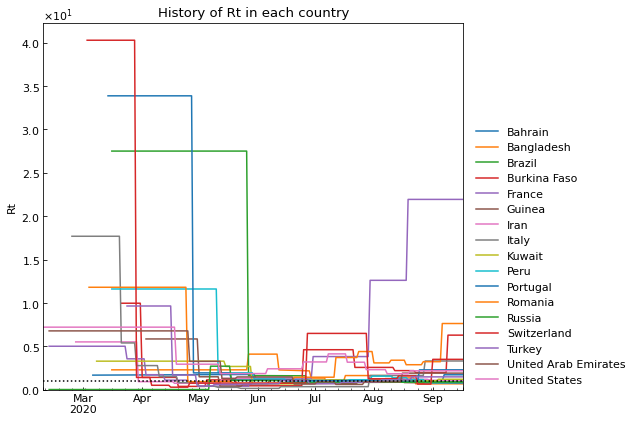

Country,Bahrain,Bangladesh,Brazil,Burkina Faso,France,Guinea,Iran,Italy,Kuwait,Peru,Portugal,Romania,Russia,Switzerland,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,,
2020-09-13,1.72,0.68,0.9,6.29,21.94,0.73,1.08,3.31,1.2,0.8,2.29,7.63,0.88,3.5,1.48,1.91,2.18
2020-09-14,1.72,0.68,0.9,6.29,21.94,0.73,1.08,3.31,1.2,0.8,2.29,7.63,0.88,3.5,1.48,1.91,2.18
2020-09-15,1.72,0.68,0.9,6.29,21.94,0.73,1.08,3.31,1.2,0.8,2.29,7.63,0.88,3.5,1.48,1.91,2.18
2020-09-16,1.72,0.68,0.9,6.29,21.94,0.73,1.08,3.31,1.2,0.8,2.29,7.63,0.88,3.5,1.48,1.91,2.18
2020-09-17,1.72,0.68,0.9,6.29,21.94,0.73,1.08,3.31,1.2,0.8,2.29,7.63,0.88,3.5,1.48,1.91,2.18


In [14]:
analyser.param_history("Rt", roll_window=None).tail()

### $\rho$: Effective contact rate $\mathrm{[-]}$

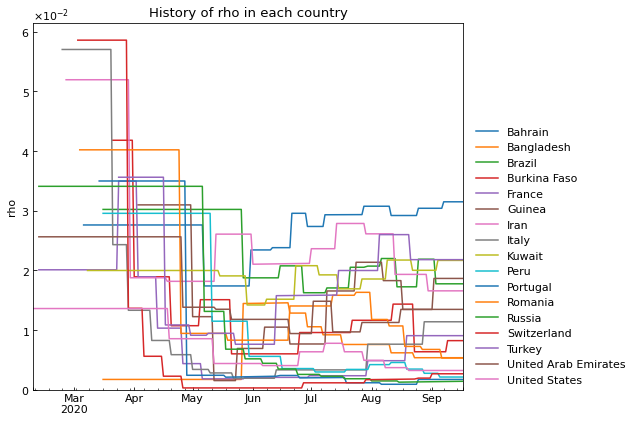

Country,Bahrain,Bangladesh,Brazil,Burkina Faso,France,Guinea,Iran,Italy,Kuwait,Peru,Portugal,Romania,Russia,Switzerland,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,,
2020-09-13,0.031486,0.005361,0.017745,0.008222,0.009056,0.018645,0.016566,0.011382,0.021667,0.002124,0.001721,0.005303,0.001409,0.002668,0.021793,0.013458,0.003221
2020-09-14,0.031486,0.005361,0.017745,0.008222,0.009056,0.018645,0.016566,0.011382,0.021667,0.002124,0.001721,0.005303,0.001409,0.002668,0.021793,0.013458,0.003221
2020-09-15,0.031486,0.005361,0.017745,0.008222,0.009056,0.018645,0.016566,0.011382,0.021667,0.002124,0.001721,0.005303,0.001409,0.002668,0.021793,0.013458,0.003221
2020-09-16,0.031486,0.005361,0.017745,0.008222,0.009056,0.018645,0.016566,0.011382,0.021667,0.002124,0.001721,0.005303,0.001409,0.002668,0.021793,0.013458,0.003221
2020-09-17,0.031486,0.005361,0.017745,0.008222,0.009056,0.018645,0.016566,0.011382,0.021667,0.002124,0.001721,0.005303,0.001409,0.002668,0.021793,0.013458,0.003221


In [15]:
analyser.param_history("rho", roll_window=None).tail()

### $\sigma$: Recovery rate $\mathrm{[-]}$

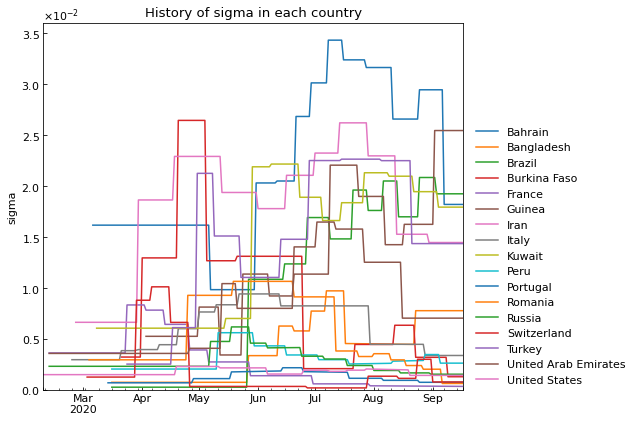

Country,Bahrain,Bangladesh,Brazil,Burkina Faso,France,Guinea,Iran,Italy,Kuwait,Peru,Portugal,Romania,Russia,Switzerland,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,,
2020-09-13,0.018196,0.007761,0.01924,0.001274,0.000326,0.025453,0.014455,0.003361,0.017931,0.002609,0.000726,0.000612,0.001521,0.00076,0.01435,0.007028,0.001405
2020-09-14,0.018196,0.007761,0.01924,0.001274,0.000326,0.025453,0.014455,0.003361,0.017931,0.002609,0.000726,0.000612,0.001521,0.00076,0.01435,0.007028,0.001405
2020-09-15,0.018196,0.007761,0.01924,0.001274,0.000326,0.025453,0.014455,0.003361,0.017931,0.002609,0.000726,0.000612,0.001521,0.00076,0.01435,0.007028,0.001405
2020-09-16,0.018196,0.007761,0.01924,0.001274,0.000326,0.025453,0.014455,0.003361,0.017931,0.002609,0.000726,0.000612,0.001521,0.00076,0.01435,0.007028,0.001405
2020-09-17,0.018196,0.007761,0.01924,0.001274,0.000326,0.025453,0.014455,0.003361,0.017931,0.002609,0.000726,0.000612,0.001521,0.00076,0.01435,0.007028,0.001405


In [16]:
analyser.param_history("sigma", roll_window=None).tail()

### $\kappa$: Mortality rate of infected cases $\mathrm{[-]}$

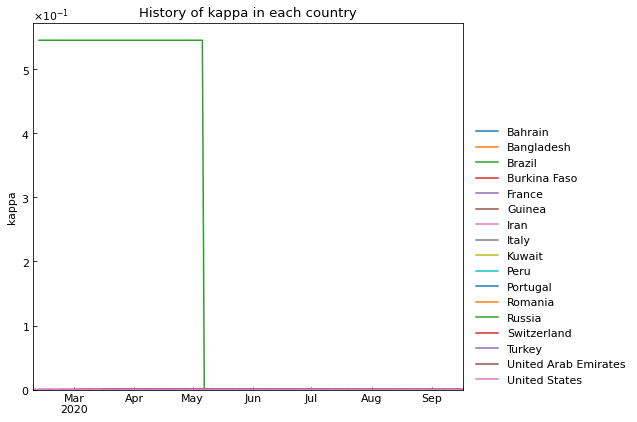

Country,Bahrain,Bangladesh,Brazil,Burkina Faso,France,Guinea,Iran,Italy,Kuwait,Peru,Portugal,Romania,Russia,Switzerland,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,,
2020-09-13,0.000076,0.000014,0.000112,0.000031,0.000087,0.000093,0.000173,0.000079,0.000087,0.000002,0.000025,0.00007,0.000002,0.000001,0.000309,0.000001,0.000071
2020-09-14,0.000076,0.000014,0.000112,0.000031,0.000087,0.000093,0.000173,0.000079,0.000087,0.000002,0.000025,0.00007,0.000002,0.000001,0.000309,0.000001,0.000071
2020-09-15,0.000076,0.000014,0.000112,0.000031,0.000087,0.000093,0.000173,0.000079,0.000087,0.000002,0.000025,0.00007,0.000002,0.000001,0.000309,0.000001,0.000071
2020-09-16,0.000076,0.000014,0.000112,0.000031,0.000087,0.000093,0.000173,0.000079,0.000087,0.000002,0.000025,0.00007,0.000002,0.000001,0.000309,0.000001,0.000071
2020-09-17,0.000076,0.000014,0.000112,0.000031,0.000087,0.000093,0.000173,0.000079,0.000087,0.000002,0.000025,0.00007,0.000002,0.000001,0.000309,0.000001,0.000071


In [17]:
analyser.param_history("kappa", roll_window=None).tail()

### $\theta$: Mortality rate of S$^\ast$ cases $\mathrm{[-]}$

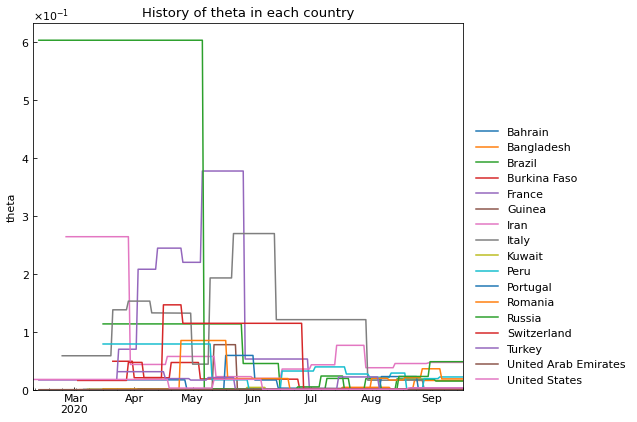

Country,Bahrain,Bangladesh,Brazil,Burkina Faso,France,Guinea,Iran,Italy,Kuwait,Peru,Portugal,Romania,Russia,Switzerland,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,,
2020-09-13,0.000251,0.01593,0.014891,0.000938,0.00039,0.001795,0.047033,0.000344,0.000289,0.021981,0.001325,0.018661,0.048328,0.001314,0.003232,0.001262,0.003015
2020-09-14,0.000251,0.01593,0.014891,0.000938,0.00039,0.001795,0.047033,0.000344,0.000289,0.021981,0.001325,0.018661,0.048328,0.001314,0.003232,0.001262,0.003015
2020-09-15,0.000251,0.01593,0.014891,0.000938,0.00039,0.001795,0.047033,0.000344,0.000289,0.021981,0.001325,0.018661,0.048328,0.001314,0.003232,0.001262,0.003015
2020-09-16,0.000251,0.01593,0.014891,0.000938,0.00039,0.001795,0.047033,0.000344,0.000289,0.021981,0.001325,0.018661,0.048328,0.001314,0.003232,0.001262,0.003015
2020-09-17,0.000251,0.01593,0.014891,0.000938,0.00039,0.001795,0.047033,0.000344,0.000289,0.021981,0.001325,0.018661,0.048328,0.001314,0.003232,0.001262,0.003015


In [18]:
analyser.param_history("theta", roll_window=None).tail()

## (Experimental): Relationship of OxCGRT index and parameter values
Government responses will impact on parameter values of ODE models about 14 days later. Here, we will investigate on the relationship of [stringency index (from OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md) and reproduction number/model parameters.


In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
df = analyser.track()
param_cols = ["Rt", *cs.SIRF.PARAMETERS]
oxcgrt_cols = oxcgrt_data.OXCGRT_VARS[:]
cols = param_cols + oxcgrt_cols
delay = 14

for col in param_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df.groupby("Country")[col].shift(0 - delay)

df = df.dropna(how="any")
df = df.loc[:, ["Date", "Country", *cols]]
track_df = df.copy()
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54903 entries, 0 to 55126
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 54903 non-null  datetime64[ns]
 1   Country                              54903 non-null  object        
 2   Rt                                   54903 non-null  float64       
 3   theta                                54903 non-null  float64       
 4   kappa                                54903 non-null  float64       
 5   rho                                  54903 non-null  float64       
 6   sigma                                54903 non-null  float64       
 7   School_closing                       54903 non-null  int64         
 8   Workplace_closing                    54903 non-null  int64         
 9   Cancel_events                        54903 non-null  int64         
 10  Gatherings

In [21]:
# Correlation
df = track_df.copy()
df.corr().style.background_gradient(axis=None)

,Rt,theta,kappa,rho,sigma,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
Rt,1.000000,-0.235054,-0.214755,0.433633,-0.210675,-0.088511,-0.020097,-0.045314,-0.097104,-0.169870,-0.188269,-0.187269,-0.240803,-0.027385,-0.166347,-0.233878,-0.114534
theta,-0.235054,1.000000,0.955693,0.619702,-0.029230,-0.165179,-0.092123,-0.286062,-0.290102,-0.220344,0.153767,-0.012248,0.129374,-0.335743,-0.315891,0.012722,-0.113527
kappa,-0.214755,0.955693,1.000000,0.646604,-0.091504,-0.201904,-0.136775,-0.312543,-0.270932,-0.199754,0.154261,-0.004012,0.166958,-0.363623,-0.234349,-0.002275,-0.155509
rho,0.433633,0.619702,0.646604,1.000000,0.036270,-0.103071,-0.079416,-0.321952,-0.297113,-0.216488,0.109679,-0.078017,-0.048571,-0.347028,-0.425299,-0.218992,-0.134222
sigma,-0.210675,-0.029230,-0.091504,0.036270,1.000000,0.271883,0.077269,0.072177,-0.083705,0.068517,0.090210,0.013405,-0.001494,0.089146,-0.135003,0.105688,0.147881
School_closing,-0.088511,-0.165179,-0.201904,-0.103071,0.271883,1.000000,0.723543,0.652896,0.646069,0.557933,0.605892,0.577697,0.474085,0.643394,0.327071,0.204727,0.822260
Workplace_closing,-0.020097,-0.092123,-0.136775,-0.079416,0.077269,0.723543,1.000000,0.680727,0.764332,0.527210,0.648812,0.620116,0.481966,0.731422,0.391338,0.263535,0.859101
Cancel_events,-0.045314,-0.286062,-0.312543,-0.321952,0.072177,0.652896,0.680727,1.000000,0.788134,0.407450,0.462709,0.519202,0.534376,0.898744,0.589156,0.597401,0.798237
Gatherings_restrictions,-0.097104,-0.290102,-0.270932,-0.297113,-0.083705,0.646069,0.764332,0.788134,1.000000,0.634251,0.626020,0.690073,0.601703,0.801350,0.576696,0.371419,0.863628
Transport_closing,-0.169870,-0.220344,-0.199754,-0.216488,0.068517,0.557933,0.527210,0.407450,0.634251,1.000000,0.657770,0.721799,0.501202,0.435512,0.335935,0.124315,0.724809


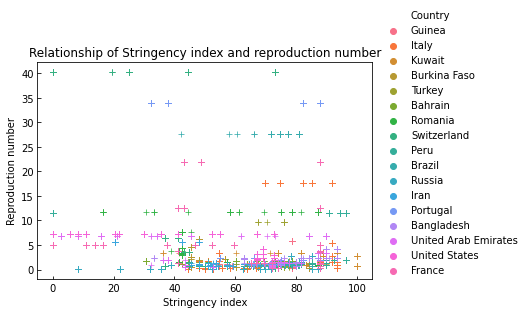

In [22]:
# Scatter plot of Stringency index and Rt
df = track_df.copy()
sns.scatterplot(data=df, x="Stringency_index", y="Rt", hue="Country", legend="brief", marker="+")
bbox_to_anchor=(1.02, 0)
bbox_loc="lower left"
plt.legend(bbox_to_anchor=bbox_to_anchor, loc=bbox_loc, borderaxespad=0)
plt.title("Relationship of Stringency index and reproduction number")
plt.ylabel("Reproduction number")
plt.xlabel("Stringency index")
plt.show()